# Future prediction with Facebook prophet

This notebooks aim to predict future stock price by using Facebook Prophet library. Here, instead of building a model that predicts absolute price, I will build a model that predicts daily price changes, which is more robust to non-stationarity, and is more intuitively correct.

**Intuition**
Facebook prophet model decomposes value into 3 components as followed:

\begin{equation}
y(t) = g(t) + s(t) + h(t)
\end{equation}

whereas:

* $g(t)$ represents trends, modeling non-periodic changes
* $s(t)$ represents seasonality, modeling periodic changes
* $h(t)$ represents holidays, modeling effects of hollidays and special events

**Results**
* The validation prediction, though incorrect, looks reasonable.
* The future prediction looks very similar with Sarima results, and is too stable

**Credits**: I learned about Facebook prophet from [here](https://mlcourse.ai/articles/topic9-part2-prophet)

## Import libraries and data

In [275]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import datetime


# Library for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 18

}
rcParams.update(params)
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi'] = 100

from mplfinance.original_flavor import candlestick2_ohlc
import mplfinance as mpf

In [332]:
# Stock price
asset = "^GSPC"
df_orig = wb.DataReader('^GSPC', data_source='yahoo', start='2015-1-1')
df_orig.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

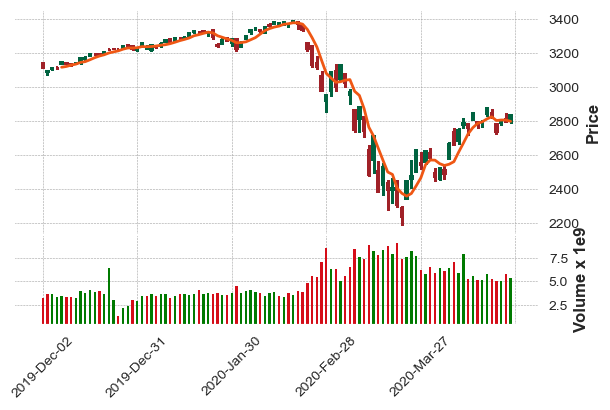

In [333]:
df_plt = df_orig[-100:]
kwargs = dict(type='candle',mav=(5),volume=True,figratio=(10,6),figscale=0.75)
mpf.plot(df_plt,**kwargs,style='charles')

## Making prediction with Naive Prophet

In [334]:
from fbprophet import Prophet

In [335]:
df = df_orig.reset_index()[['Date','Adj Close']]
df.columns = ['ds','y_orig']
df['y'] = df['y_orig'].diff(1)/df['y_orig'].shift(1)
df = df[1:]

In [336]:
pred_idx = -30
df_train = df[:pred_idx]
df_val = df[pred_idx:]

df_train.head()

,ds,y_orig,y
1,2015-01-02,2058.199951,-0.000340
2,2015-01-05,2020.579956,-0.018278
3,2015-01-06,2002.609985,-0.008893
4,2015-01-07,2025.900024,0.011630
5,2015-01-08,2062.139893,0.017888


In [337]:
len(df_val)

30

In [338]:
m = Prophet(seasonality_mode='multiplicative',
           yearly_seasonality=True,
           weekly_seasonality=True)

In [339]:
m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [340]:
df_val

,ds,y_orig,y
1308,2020-03-13,2711.020020,0.092871
1309,2020-03-16,2386.129883,-0.119841
1310,2020-03-17,2529.189941,0.059955
1311,2020-03-18,2398.100098,-0.051831
1312,2020-03-19,2409.389893,0.004708
1313,2020-03-20,2304.919922,-0.043360
1314,2020-03-23,2237.399902,-0.029294
1315,2020-03-24,2447.330078,0.093828
1316,2020-03-25,2475.560059,0.011535
1317,2020-03-26,2630.070068,0.062414


In [341]:
forecast = m.predict(df_val[['ds']])
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
25,2020-04-20,-0.005093,-0.018673,0.005596,-0.005100,-0.005087,0.412243,0.412243,0.412243,-0.148658,-0.148658,-0.148658,0.560900,0.560900,0.560900,0.0,0.0,0.0,-0.007193
26,2020-04-21,-0.005106,-0.016057,0.009408,-0.005113,-0.005099,-0.282476,-0.282476,-0.282476,-0.978361,-0.978361,-0.978361,0.695886,0.695886,0.695886,0.0,0.0,0.0,-0.003664
27,2020-04-22,-0.005118,-0.013731,0.009741,-0.005126,-0.005112,-0.591196,-0.591196,-0.591196,-1.409544,-1.409544,-1.409544,0.818349,0.818349,0.818349,0.0,0.0,0.0,-0.002092
28,2020-04-23,-0.005131,-0.022749,0.000436,-0.005139,-0.005123,1.188770,1.188770,1.188770,0.262495,0.262495,0.262495,0.926275,0.926275,0.926275,0.0,0.0,0.0,-0.011230
29,2020-04-24,-0.005143,-0.021541,0.003247,-0.005151,-0.005135,0.748294,0.748294,0.748294,-0.269932,-0.269932,-0.269932,1.018226,1.018226,1.018226,0.0,0.0,0.0,-0.008992


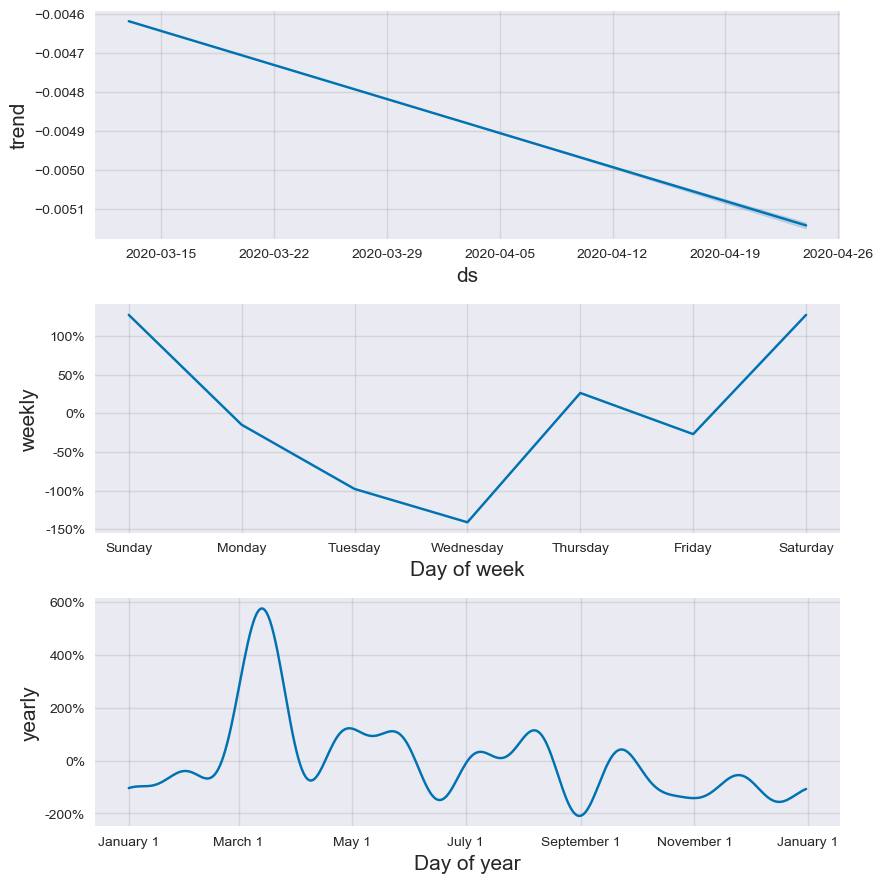

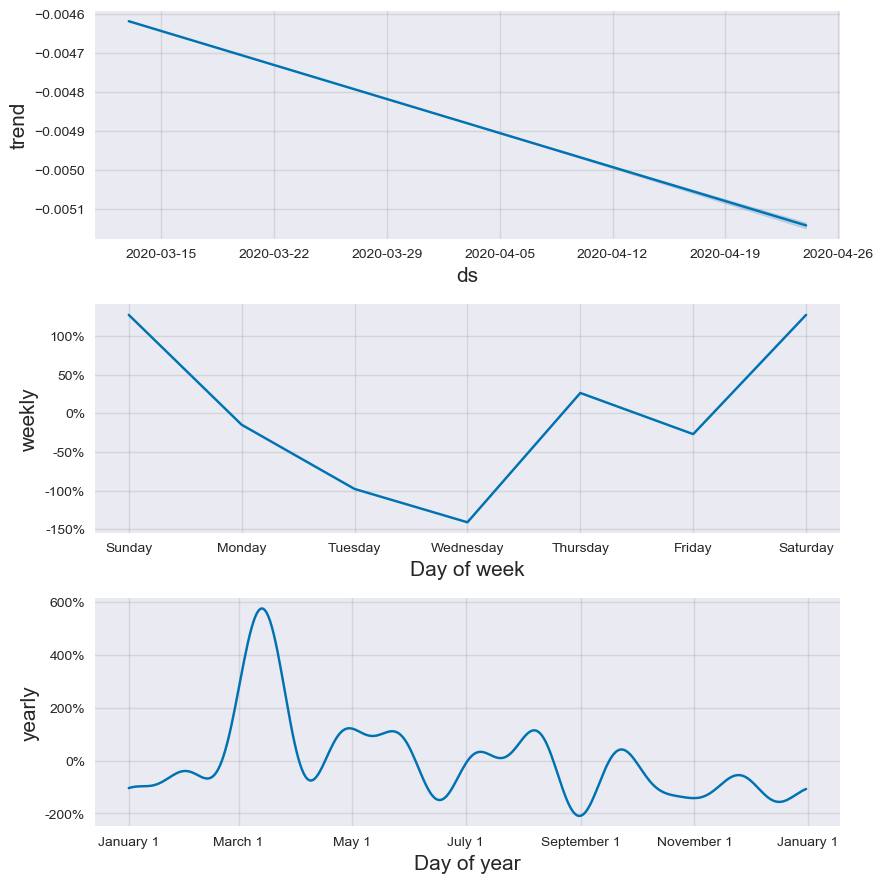

In [342]:
m.plot_components(forecast)

## Evaluation

In [343]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [344]:
df_cmp = make_comparison_dataframe(df_val, forecast)
df_cmp.tail()

,yhat,yhat_lower,yhat_upper,y_orig,y
ds,,,,,
2020-04-20,-0.007193,-0.018673,0.005596,2823.159912,-0.017881
2020-04-21,-0.003664,-0.016057,0.009408,2736.560059,-0.030675
2020-04-22,-0.002092,-0.013731,0.009741,2799.310059,0.022930
2020-04-23,-0.011230,-0.022749,0.000436,2797.800049,-0.000539
2020-04-24,-0.008992,-0.021541,0.003247,2836.739990,0.013918


In [345]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [346]:
for err_name, err_value in calculate_forecast_errors(df_cmp, pred_size).items():
    print(err_name, err_value)

MAPE 195.00452154250095
MAE 0.036169820884940626


In [347]:
def plot_time(y_train, y_pred, start_date=None, y_val=None):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    x_train = np.arange(-len(y_train),0,1)
    x_pred = np.arange(1,len(y_pred)+1,1)
    plt.plot(x_train, y_train, color='black', linewidth=1.5, label='Historical price')
    plt.plot(x_pred, y_pred, color='red',label='Prediction',alpha=0.8)
    try:
        x_val = np.arange(1,len(y_val)+1,1)
        plt.plot(x_val, y_val, color='blue',label='Val',alpha=0.6)
    except:
        pass
    plt.xlabel('Days')
    plt.ylabel('Price')
    fig.canvas.draw()
    
    # Label start date
    labels = [item.get_text() for item in ax.get_xticklabels()]
    
    if start_date != None:
        for i in range(len(labels)):
            if labels[i] == '0':
                labels[i] = start_date
    ax.set_xticklabels(labels)
    plt.legend(loc='best')

In [348]:
y_train = df_train[-200:]['y']
y_pred = forecast.loc[:,'yhat']
start_date = df_train.loc[len(df_train)-1,'ds']
y_val = df_val[:]['y']

Text(74.47222222222221, 0.5, 'Price change')

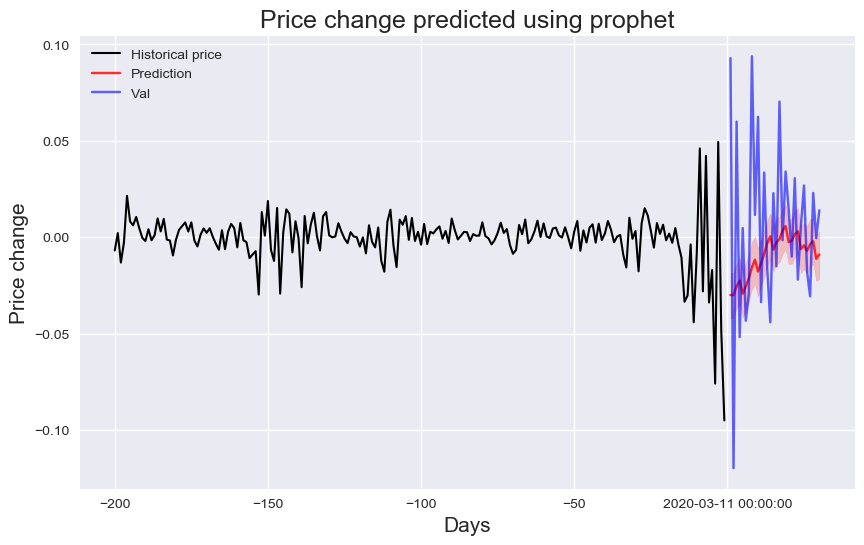

In [349]:
plot_time(y_train, y_pred, start_date, y_val)
x_pred = np.arange(1,len(y_pred)+1,1)
plt.fill_between(x_pred, forecast.loc[:,'yhat_lower'],forecast.loc[:,'yhat_upper'], alpha=0.2, color='red')
plt.title('Price change predicted using prophet')
plt.ylabel('Price change')

In [350]:
def make_forward_pred(y_start, change_rate):
    outlist = []
    y_last = y_start
    for rate in change_rate:
        y_cur = y_last*(1+rate)
        outlist.append(y_cur)
        y_last = y_cur
    return outlist

In [351]:
y_pred = make_forward_pred(df_train['y_orig'].values[-1], forecast.loc[:,'yhat'])
y_pred_upper = make_forward_pred(df_train['y_orig'].values[-1], forecast.loc[:,'yhat_upper'])
y_pred_lower = make_forward_pred(df_train['y_orig'].values[-1], forecast.loc[:,'yhat_lower'])

In [352]:
y_train = df_train[-200:]['y_orig']
start_date = df_train.loc[len(df_train)-1,'ds']
y_val = df_val[:]['y_orig']

Text(0.5, 1, 'Price predicted using Prophet')

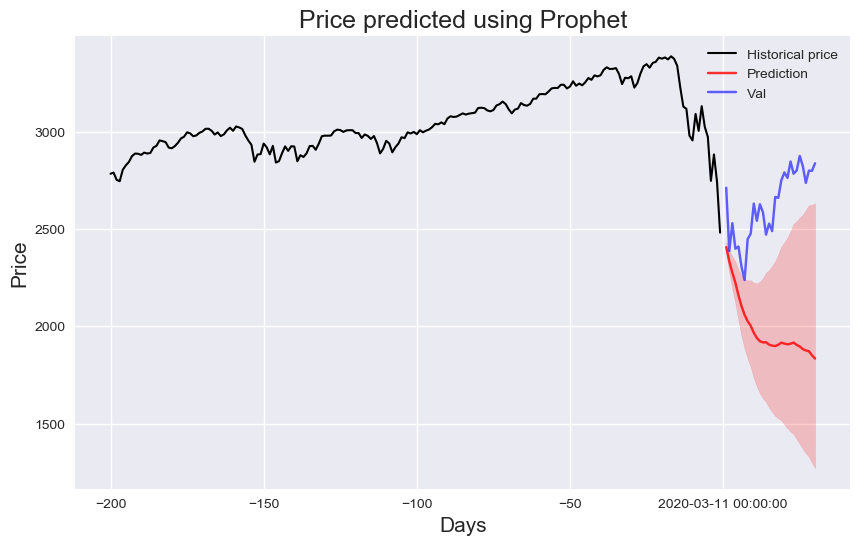

In [353]:
plot_time(y_train, y_pred, start_date, y_val)
x_pred = np.arange(1,len(y_pred)+1,1)
plt.fill_between(x_pred, y_pred_lower,y_pred_upper, alpha=0.2, color='red')
plt.title("Price predicted using Prophet")

## Future prediction

In [354]:
numdays = 30
base = datetime.datetime.today()
date_list = pd.date_range(datetime.datetime.today(), periods = 30).date.tolist()

In [355]:
df_train = df.copy()
df_val = pd.DataFrame()
df_val['ds'] = date_list

In [356]:
m_all = Prophet()
m_all.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [357]:
forecast = m_all.predict(df_val)

In [358]:
y_pred = make_forward_pred(df_train['y_orig'].values[-1], forecast.loc[:,'yhat'])
y_pred_upper = make_forward_pred(df_train['y_orig'].values[-1], forecast.loc[:,'yhat_upper'])
y_pred_lower = make_forward_pred(df_train['y_orig'].values[-1], forecast.loc[:,'yhat_lower'])

Text(0.5, 1, 'Price predicted using Prophet')

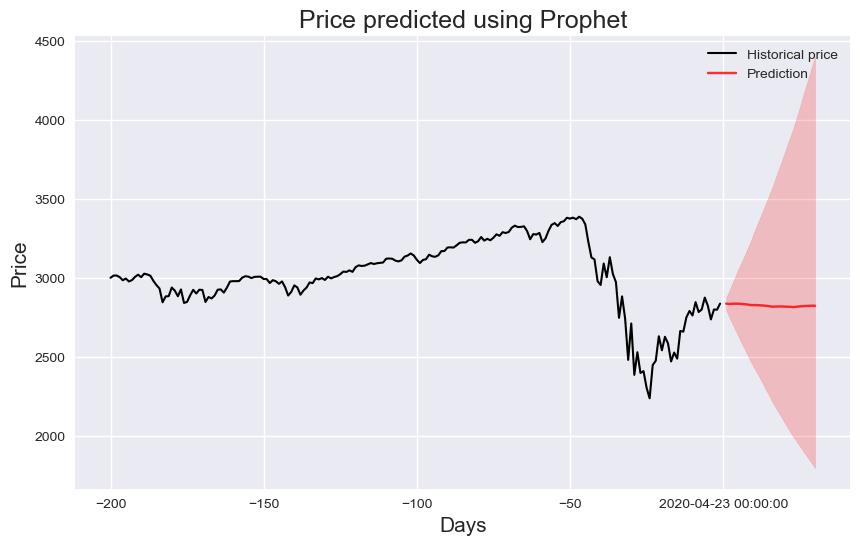

In [359]:
y_train = df_train[-200:]['y_orig']
start_date = df_train.loc[len(df_train)-1,'ds']

plot_time(y_train, y_pred, start_date)
x_pred = np.arange(1,len(y_pred)+1,1)
plt.fill_between(x_pred, y_pred_lower,y_pred_upper, alpha=0.2, color='red')
plt.title("Price predicted using Prophet")